# **Visualising What CNNs Learn**

---


In this part we use **Keras with a TensorFlow 2.0** to visualise the following:
1. Training a basic CNN on the MNIST Dataset
2. Visualise its filters
3. Visualise the filter activations as we propagate an input image

##**1. Training a Basic CNN on the MNIST Dataset**

In [ ]:
# We can load the built in datasets from this function
from tensorflow.keras.datasets import mnist

# loads the MNIST training and test dataset 
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4339432258548682594
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14401011712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1926601369319051063
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


In [ ]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
batch_size = 128
epochs = 10

# Store our results here so we can plot later
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 8s 10ms/step - loss: 2.2570 - accuracy: 0.2424 - val_loss: 2.1759 - val_accuracy: 0.3963
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 1.9518 - accuracy: 0.5765 - val_loss: 1.5311 - val_accuracy: 0.7258
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 1.0060 - accuracy: 0.7932 - val_loss: 0.6102 - val_accuracy: 0.8541
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5204 - accuracy: 0.8634 - val_loss: 0.4174 - val_accuracy: 0.8898
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4070 - accuracy: 0.8863 - val_loss: 0.3556 - val_accuracy: 0.9000
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3607 - accuracy: 0.8966 - val_loss: 0.3266 - val_accuracy: 0.9075
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3337 - accuracy: 0.9039 - val_loss: 0.3042 - val_accuracy: 0.9140
Epoch

## **Get the symbolic outputs of each "key" layer (we gave them unique names).**

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <keras.layers.convolutional.conv2d.Conv2D at 0x7fb7781c22b0>,
 'conv2d_1': <keras.layers.convolutional.conv2d.Conv2D at 0x7fb7eb2d2190>,
 'max_pooling2d': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7fb77d873190>,
 'flatten': <keras.layers.reshaping.flatten.Flatten at 0x7fb77d873820>,
 'dense': <keras.layers.core.dense.Dense at 0x7fb77d842490>,
 'dense_1': <keras.layers.core.dense.Dense at 0x7fb77d860b80>}

## **Get the shapes of only our Conv Filters**

In [ ]:
# summarize filter shapes
for layer in model.layers:
  
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue

  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


## **Let's take a look at the weights of our first Conv Layer**

In [ ]:
# retrieve weights from the first Conv (hidden) layer
filters, biases = model.layers[0].get_weights()

In [ ]:
# Let's take a look at our filters
print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[ 1.37896597e-01,  9.67539623e-02, -8.26237276e-02,
          -5.45136034e-02, -8.27458501e-02,  3.09904967e-03,
          -6.65498897e-02,  2.26246268e-01,  9.68348905e-02,
           1.65080979e-01,  4.82095629e-02, -6.37657195e-03,
           2.21150145e-01, -5.64706028e-02,  1.48757398e-01,
          -9.04592946e-02,  1.07724853e-01,  6.67347992e-03,
          -1.43886209e-01, -6.26457557e-02, -5.23387566e-02,
          -8.07238892e-02,  5.14116958e-02,  3.85287181e-02,
           7.57856369e-02,  2.17804611e-01, -8.17800760e-02,
          -1.38283372e-01, -1.19688980e-01, -4.40917211e-03,
          -8.59676767e-03,  1.73791319e-01]],

        [[ 1.78569369e-02, -2.68238187e-02,  1.83153167e-01,
           4.77536246e-02,  4.48103249e-02,  5.68151549e-02,
           1.11110792e-01,  2.64147222e-01,  3.07995342e-02,
          -2.32459903e-02,  1.88201338e-01,  2.11770743e-01,
           1.84351668e-01,  4.08190861e-02,  4.25225012e-02,
          -3.41673195e-02, -2.01401152

In [ ]:
# And now let's look at our biases
print(biases.shape)
biases

(32,)


array([ 1.6816642e-02, -6.9073108e-03,  2.0540985e-05,  3.4610746e-06,
        2.5255498e-03,  6.9270283e-03,  8.7601189e-03,  8.3045289e-03,
        1.4881579e-02,  3.5703921e-05,  9.1649238e-03,  1.1961186e-02,
        1.1347788e-04,  1.3012741e-03,  1.6924271e-02,  2.5288567e-02,
        1.5970469e-02,  1.4371382e-02,  5.4795784e-03, -1.0899806e-02,
        5.7542617e-03,  3.3450238e-03, -1.2115413e-02,  1.0480048e-02,
        3.2214476e-03,  1.0498174e-02, -8.2018049e-03,  5.7897182e-06,
        1.1046717e-02, -8.7624148e-06, -1.0668229e-02,  1.0292190e-02],
      dtype=float32)

## **Let's normalize filter values to 0-1 so we can visualize them**

Our Filter weights range

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
print(f'Before Normalisation, Min = {f_min} and Max =  {f_max}')

filters = (filters - f_min) / (f_max - f_min)
print(f'After Normalisation, Min = {filters.min()} and Max =  {filters.max()}')

Before Normalisation, Min = -0.14388620853424072 and Max =  0.30873048305511475
After Normalisation, Min = 0.0 and Max =  1.0


## **Visualize our Trained Fillters**

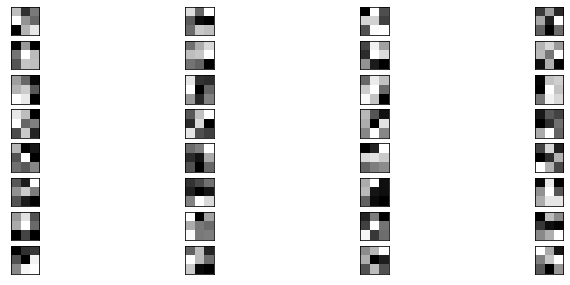

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plot first few filters and set plot size
n_filters, ix = 32, 1
plt.figure(figsize=(12,20))

for i in range(n_filters):

    # get the filter
    f = filters[:, :, :, i]
    
    #print(f.shape)

    # Arrange in subplot of 4 x 8
    ax = plt.subplot(n_filters, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    # plot filter channel in grayscale
    plt.imshow(np.squeeze(f, axis=2), cmap='gray')
    ix += 1
    
# show the figure
plt.show()

# **Filter Activations**

In [ ]:
from tensorflow.keras.models import Model

# Extracts the outputs of the top 2 layers
layer_outputs = [layer.output for layer in model.layers[:2]]

# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 24, 24, 64) dtype=float32 (created by layer 'conv2d_1')>]

(-0.5, 27.5, 27.5, -0.5)

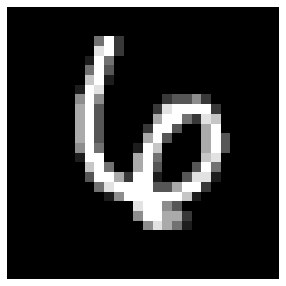

In [ ]:
import matplotlib.pyplot as plt

img_tensor = x_test[22].reshape(1,28,28,1)

fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0], cmap="gray")
plt.axis('off')

## **Get the output after the 2nd Conv Filter (after ReLU)**

In [ ]:
# Returns a list of two Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

1/1 [==============================] - 0s 217ms/step
Number of layer activations: 2


#### **The activation of the first convolution layer for the image input**

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [ ]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 24, 24, 64)


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## **The output of the 4th Conv filter Feature Map in the first Conv layer**

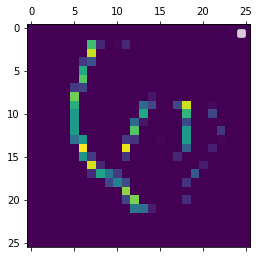

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.legend()

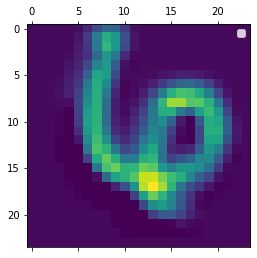

In [ ]:
plt.matshow(second_layer_activation[0, :, :, 3], cmap='viridis')
plt.legend()

## **Create a function that displys the activations of specific layers**

In [ ]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2,col_size*3))
    for row in range(0, row_size):
        for col in range(0, col_size):
            plt.axis = ('off')
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

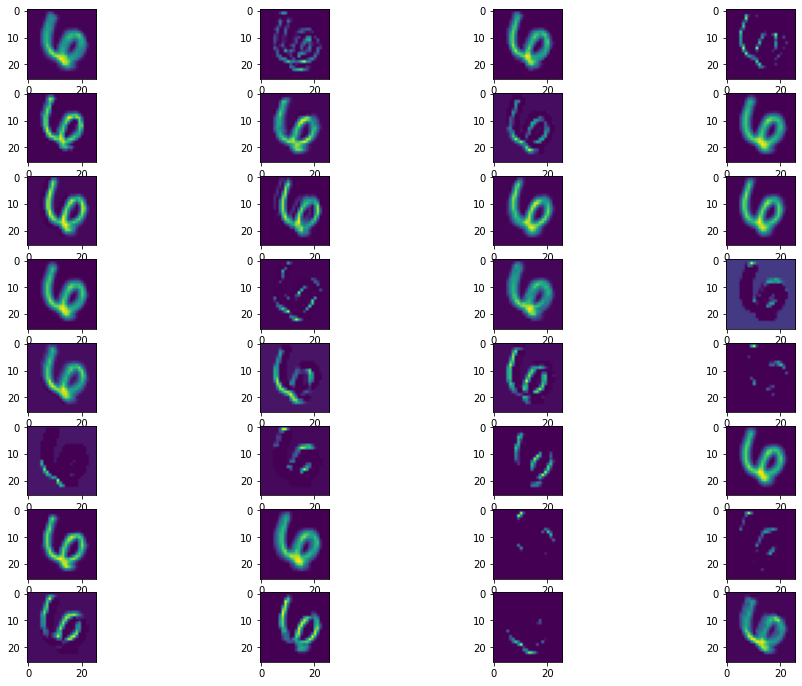

In [ ]:
display_activation(activations, 4, 8, 0)

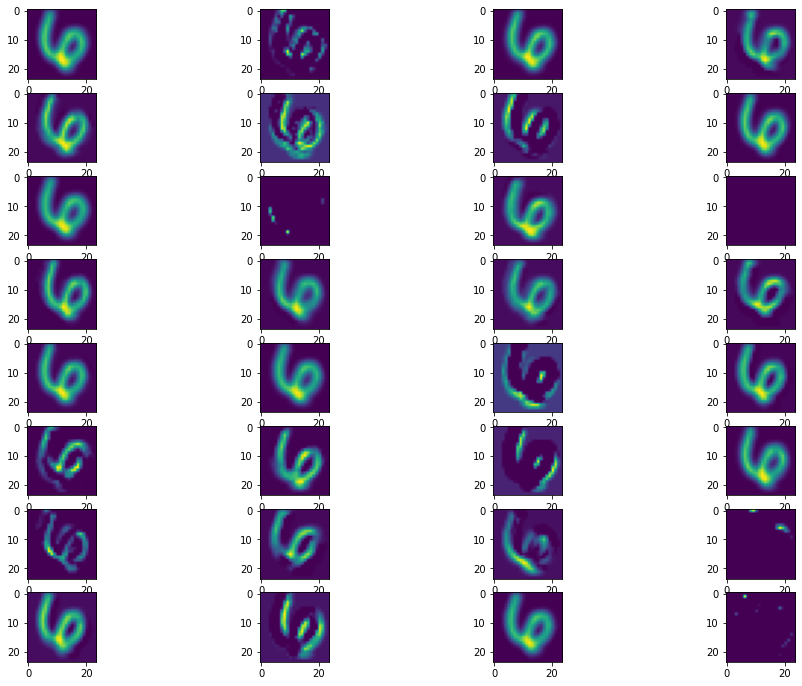

In [ ]:
display_activation(activations, 4, 8, 1)